# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

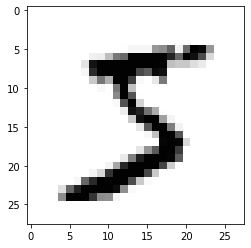

In [4]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer_1 = tf.keras.regularizers.l1(1e-3)
regularizer_2 = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer_1)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [8]:
def plot_history(history):
    plt.figure(figsize = (10,10))
    for e, (item, value) in enumerate(history.history.items()):
        plt.subplot(2,2,e+1)
        plt.plot(value)
        plt.title(item)
    plt.show()

In [11]:
model_sigmoid_adam = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, 
                          activation="sigmoid",
                          activity_regularizer=regularizer_2,
                          kernel_initializer=initializer_list[0])
])
model_sigmoid_adam.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
model_sigmoid_adam.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))

model_sigmoid_adam.compile(loss = "sparse_categorical_crossentropy",
                        optimizer = tf.optimizers.Adam(lr=0.001), 
                        metrics = "accuracy")
model_sigmoid_adam.summary()                        
history_sigmoid_adam = model_sigmoid_adam.fit(x_train, y_train, epochs=10)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4435 - accuracy: 0.8923
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1505 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0977 - accuracy: 0.9762
Epoch 

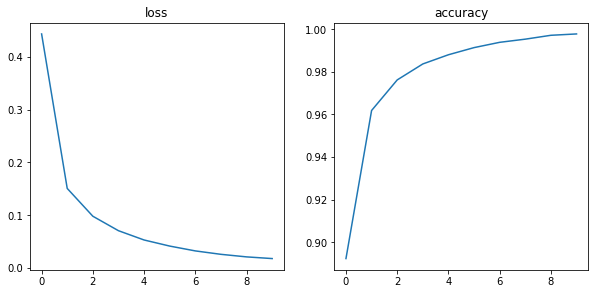

In [12]:
plot_history(history_sigmoid_adam)

95%이상의 성능을 가진 모델을 만들면 완성!

In [13]:
test_loss, test_acc = model_sigmoid_adam.evaluate(x_test,y_test, verbose=2)
print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0840 - accuracy: 0.9806 - 796ms/epoch - 3ms/step

Accuracy: 0.9805999994277954


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)